In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

class Perceptron(object):
     
    def __init__(self, n_iterations=100, random_state=1, learning_rate=0.01):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate
 
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iterations):
            errors = 0
            for xi, expected_value in zip(X, y):
                predicted_value = self.predict(xi)
                self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
                self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1
                update = self.learning_rate * (expected_value - predicted_value)
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
            weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
            return weighted_sum
     
 
    def activation_function(self, X):
            weighted_sum = self.net_input(X)
            return np.where(weighted_sum >= 0.0, 1, 0)
  
    def predict(self, X):
        return self.activation_function(X)

    def score(self, X, y):
        misclassified_data_count = 0
        for xi, target in zip(X, y):
            output = self.predict(xi)
            if(target != output):
                misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        return self.score_

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
dataset=pd.read_excel('dataset.xlsx')
X=dataset.iloc[:,:-1]
X.head()

,SIZE,FUEL,DISTANCE,DECIBEL,AIRFLOW,FREQUENCY
0,1,gasoline,10,96,0.0,75
1,1,gasoline,10,96,0.0,72
2,1,gasoline,10,96,2.6,70
3,1,gasoline,10,96,3.2,68
4,1,gasoline,10,109,4.5,67


In [ ]:
y=dataset.iloc[:,-1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: CLASS, dtype: int64

In [ ]:
dataset["FUEL"] = dataset["FUEL"].astype('category')
dataset.dtypes
dataset["FUEL"] = dataset["FUEL"].cat.codes
dataset.head()
#dataset["AIRFLOW"] = dataset["AIRFLOW"].astype('int')
#dataset.dtypes

X1=dataset.iloc[:,:-1]
y1=dataset.iloc[:,-1]
#X1 = np.array(X1)
#X1 = X1.astype(np.float)

X2 = np.asarray(X1, dtype='float64')


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X2,y1,test_size=0.20,random_state=0)

In [ ]:

prcptrn = Perceptron(n_iterations=200)
prcptrn.fit(X_train, y_train)
prcptrn.score(X_test, y_test), prcptrn.score(X_train, y_train)


(0.8566924620235025, 0.8583100408514298)

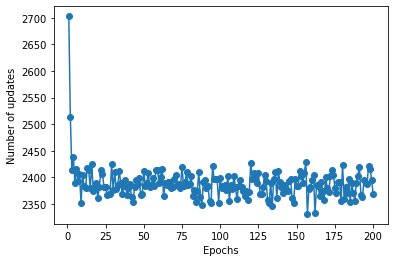

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
 

plt.show()

In [ ]:
y_pred = prcptrn.predict(X_test)
 
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
#print('Accuracy: %.3f' % prcptrn.score(X_test, y_test))

Accuracy: 0.857
